In [1]:
import requests
import json
from datetime import date
today = "2020-07-20"
start_day = "2020-05-31"
response = requests.get(f"https://api.globe.gov/search/v1/measurement/protocol/measureddate/?protocols=mosquito_habitat_mapper&startdate={start_day}&enddate={today}&geojson=FALSE&sample=FALSE")

mosquito_data = response.json()["results"]

In [2]:
import pandas as pd
set_one = pd.read_csv("CEO/1-56.csv")
set_two = pd.read_csv("CEO/57-108.csv")
set_three = pd.read_csv("CEO/109-118.csv")
ceo_df = set_one.append(set_two, ignore_index=True)
ceo_df = ceo_df.append(set_three, ignore_index=True)


In [3]:
filled_ceo_df = ceo_df[ceo_df["ANALYSES"] > 0]
filled_ceo_df

,PLOT_ID,CENTER_LON,CENTER_LAT,SIZE_M,SHAPE,FLAGGED,ANALYSES,SAMPLE_POINTS,USER_ID,COMMON_SECUREWATCH_DATE,...,LAND COVER ELEMENTS:CULTIVATED VEGETATION,LAND COVER ELEMENTS:WATER>TREATED POOL,LAND COVER ELEMENTS:WATER>LAKE/PONDED/CONTAINER,LAND COVER ELEMENTS:WATER>RIVERS/STREAM,LAND COVER ELEMENTS:WATER>IRRIGATION DITCH,LAND COVER ELEMENTS:SHADOW,LAND COVER ELEMENTS:UNKNOWN,LAND COVER ELEMENTS:BARE GROUND,LAND COVER ELEMENTS:BUILDING,LAND COVER ELEMENTS:IMPERVIOUS SURFACE (NO BUILDING)
0,137373149,-84.711729,39.468432,100.0,square,False,1,121,treashurerichardson2003@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,5.785124,4.958678,0.000000,4.132231,6.611570
1,137373150,-84.711729,39.471899,100.0,square,False,1,121,treashurerichardson2003@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,13.223140,0.000000,41.322314,0.000000,0.000000
2,137373151,-84.711729,39.475366,100.0,square,False,1,121,gowtham.kadiyala01@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
36,137373185,-97.178299,32.846877,100.0,square,False,1,121,c_e_weller@icloud.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,2.479339,0.000000,15.702479,48.760331
37,137373186,-97.178299,32.850650,100.0,square,False,1,121,c_e_weller@icloud.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.652893,36.363636,14.049587,14.049587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,137458533,-83.646971,41.369544,100.0,square,False,1,121,seyoungree@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,19.834711,8.264463
4244,137458534,-83.646971,41.372915,100.0,square,False,1,121,seyoungree@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,14.876033,39.669421
4245,137458535,-83.646971,41.376285,100.0,square,False,1,121,seyoungree@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,28.099174,59.504132
4246,137458536,-83.646971,41.379656,100.0,square,False,1,121,seyoungree@gmail.com,NaN,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,8.264463,10.743802


In [4]:
import requests
import json

with open('info.txt') as json_file:
    data = json.load(json_file)

response = requests.post('https://lpdaacsvc.cr.usgs.gov/appeears/api/login', auth=(data["username"], data["password"]))
token_response = response.json()
print(token_response)

{'token_type': 'Bearer', 'token': 'o0Ua5TD4_F0OahmQiOTXnBpNr-8pcJ2uskcIgN21vLyIU95Pi57lLePkO3yQSm5oc5y8c8Jqf6UyZ_vrAm5OdA', 'expiration': '2020-09-18T15:29:45Z'}


In [5]:
mosquito_data_df = pd.DataFrame(mosquito_data)
data_df_temp = pd.DataFrame(mosquito_data_df["data"].to_dict()).transpose()

mosquito_data_df = mosquito_data_df.join(data_df_temp)
mosquito_data_df.drop(["data"], axis=1)
mosquito_data_df.to_csv("results/CSV/mosquito_data.csv")
mosquito_data_df = mosquito_data_df.rename(columns = {"latitude" : "mosquito_latitude", "longitude" : "mosquito_longitude"})
mosquito_data_df

,protocol,measuredDate,createDate,updateDate,publishDate,organizationId,organizationName,siteId,siteName,countryName,...,mosquitohabitatmapperComments,mosquitohabitatmapperMosquitoPupae,mosquitohabitatmapperWaterSourcePhotoUrls,mosquitohabitatmapperDataSource,mosquitohabitatmapperLarvaFullBodyPhotoUrls,mosquitohabitatmapperMeasurementLatitude,mosquitohabitatmapperLastIdentifyStage,mosquitohabitatmapperWaterSourceType,mosquitohabitatmapperMosquitoHabitatMapperId,mosquitohabitatmapperMeasurementLongitude
0,mosquito_habitat_mapper,2020-06-10,2020-06-11T18:30:04,2020-06-11T18:30:04,2020-09-05T21:23:09,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,...,None,False,https://data.globe.gov/system/photos/2020/06/1...,GLOBE Observer App,None,39.2539,identify,container: artificial,23007,-77.1959
1,mosquito_habitat_mapper,2020-06-11,2020-06-11T18:30:03,2020-06-11T18:30:03,2020-09-05T21:23:09,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,...,None,False,https://data.globe.gov/system/photos/2020/06/1...,GLOBE Observer App,None,39.254,identify,container: artificial,23008,-77.1961
2,mosquito_habitat_mapper,2020-06-29,2020-06-29T15:00:05,2020-06-29T15:00:05,2020-09-05T21:23:09,13063641,GPM Satellite Mission,35785,18SUJ105472,United States,...,None,False,https://data.globe.gov/system/photos/2020/06/2...,GLOBE Observer App,None,39.2541,identify,container: artificial,23951,-77.1961
3,mosquito_habitat_mapper,2020-07-09,2020-07-09T09:25:02,2020-07-09T09:25:02,2020-09-05T21:23:09,191867,Walailak University,44797,47PNK981553,Thailand,...,None,False,None,GLOBE Observer App,None,8.6421,identify-later,container: artificial,24500,99.8918
4,mosquito_habitat_mapper,2020-06-29,2020-06-29T15:00:03,2020-06-29T15:00:06,2020-09-05T21:23:09,13063641,GPM Satellite Mission,46273,18SUJ104472,United States,...,None,False,https://data.globe.gov/system/photos/2020/06/2...,GLOBE Observer App,None,39.254,identify,container: artificial,23949,-77.1962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,mosquito_habitat_mapper,2020-07-19,2020-07-25T08:40:02,2020-07-25T08:40:06,2020-09-05T21:23:09,163028,Princess Chulabhorn Science High School Trang,210609,47NNJ660330,Thailand,...,None,False,https://data.globe.gov/system/photos/2020/07/1...,GLOBE Observer App,None,7.5358,identify,container: artificial,25119,99.5989
2004,mosquito_habitat_mapper,2020-07-14,2020-07-28T18:30:03,2020-07-28T20:30:03,2020-09-05T21:23:09,17043304,United States of America Citizen Science,210981,18TWK492743,None,...,None,False,https://data.globe.gov/system/photos/2020/07/1...,GLOBE Observer App,None,40.4185,identify-later,container: artificial,25141,-74.42
2005,mosquito_habitat_mapper,2020-07-14,2020-07-28T18:30:03,2020-07-28T20:30:03,2020-09-05T21:23:09,17043304,United States of America Citizen Science,210981,18TWK492743,None,...,None,False,https://data.globe.gov/system/photos/2020/07/1...,GLOBE Observer App,None,40.4179,identify-later,still: lake/pond/swamp,25139,-74.4193
2006,mosquito_habitat_mapper,2020-07-01,2020-08-28T17:15:05,2020-08-28T17:15:05,2020-09-05T21:23:09,22467264,Institute for Global Environmental Strategies ...,213942,13TDE795406,United States,...,aAOI grid oxford,False,https://data.globe.gov/system/photos/2020/07/0...,GLOBE Observer App,None,40.1163,None,flowing: still water found next to river or st...,25738,-105.24


In [6]:
mm_keys = [ "measuredDate", "mosquito_latitude", "mosquito_longitude", "mosquitohabitatmapperLarvaeCount", "mosquitohabitatmapperMeasurementElevation"]
desired_mosquito_data = mosquito_data_df[mm_keys]
desired_mosquito_data = desired_mosquito_data.fillna(0)
desired_mosquito_data

,measuredDate,mosquito_latitude,mosquito_longitude,mosquitohabitatmapperLarvaeCount,mosquitohabitatmapperMeasurementElevation
0,2020-06-10,39.253437,-77.196178,0,0
1,2020-06-11,39.253437,-77.196178,0,0
2,2020-06-29,39.253437,-77.196178,0,0
3,2020-07-09,8.641206,99.891620,2,0
4,2020-06-29,39.253415,-77.197336,0,0
...,...,...,...,...,...
2003,2020-07-19,7.535569,99.598247,44,0
2004,2020-07-14,40.417872,-74.420067,0,0
2005,2020-07-14,40.417872,-74.420067,0,0
2006,2020-07-01,40.115460,-105.240566,0,0


In [7]:
desired_mosquito_data["mosquitohabitatmapperLarvaeCount"] = desired_mosquito_data["mosquitohabitatmapperLarvaeCount"].astype(int)
desired_mosquito_data

,measuredDate,mosquito_latitude,mosquito_longitude,mosquitohabitatmapperLarvaeCount,mosquitohabitatmapperMeasurementElevation
0,2020-06-10,39.253437,-77.196178,0,0
1,2020-06-11,39.253437,-77.196178,0,0
2,2020-06-29,39.253437,-77.196178,0,0
3,2020-07-09,8.641206,99.891620,2,0
4,2020-06-29,39.253415,-77.197336,0,0
...,...,...,...,...,...
2003,2020-07-19,7.535569,99.598247,44,0
2004,2020-07-14,40.417872,-74.420067,0,0
2005,2020-07-14,40.417872,-74.420067,0,0
2006,2020-07-01,40.115460,-105.240566,0,0


In [8]:
groups = desired_mosquito_data.groupby(["mosquito_latitude", "mosquito_longitude"])

In [9]:
import sys
import os
import cgi
from IPython.display import display, HTML
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numba
from math import radians, sin, cos, acos
from decimal import *
max_dist = 2500

class Mosquito_AOI:
    
    def __init__(self, coords, group):
        self.coords = coords
        self.group = pd.DataFrame(group).reset_index().drop("index", axis = 1)
        self.ceo = pd.DataFrame()
        self.appears = pd.DataFrame()
        self.mosquito = pd.DataFrame()
        self._gen_mosquito_data()
        self.name = self._coords_to_payload()
    
    def _gen_mosquito_data(self):
        self.mosquito = pd.DataFrame({
            "lat" : [self.coords[0]],
            "lon": [self.coords[1]],
            "mapper_count" : [self.group["mosquitohabitatmapperLarvaeCount"].sum()],
            "elevation" : [self.group["mosquitohabitatmapperMeasurementElevation"].mean()]})
        
    def display(self):
        display(self.combined_df())
        
    def dist_list(self, lat, lon):
        dist = (sin(self.coords[0])*sin(lat) + cos(self.coords[0])*cos(lat)*cos(self.coords[1] - lon))
        if dist == 1.0000000000000002:
            dist = 1
        
        dist = 6371.01 * 1000 * acos(dist)
        return abs(round(dist)) <= max_dist
    
    def get_near_CEO(self, ceo_df):
        vectored_list = np.vectorize(self.dist_list)
        coincident = vectored_list(ceo_df["CENTER_LAT"].to_numpy(), ceo_df["CENTER_LON"].to_numpy())
        self.ceo = ceo_df[coincident]
        return not self.ceo.empty
    
    def combined_df(self):
        mosquito_df = pd.DataFrame()
        mosquito_df = mosquito_df.append([self.mosquito.reset_index()] * len(self.ceo), ignore_index = True)
        combined_df = pd.concat([mosquito_df, self.ceo.reset_index()], axis = 1)
        return combined_df
    
    def file_output(self):
        filepath = os.path.join(os.getcwd(), "results", self.coords)
        os.makedirs(filepath, exist_ok=True)
    
    def _coords_to_payload(self): 
        coordStr = f"{self.coords[0]}, {self.coords[1]}" 
        return coordStr      
        
class AOI_Manager:
    
    def __init__(self, groups = [], AOI_List = [], ceo_frame = pd.DataFrame()):
        self.AOI_List= AOI_List
        self.appears = pd.DataFrame()
        for coords, group in groups:
            self.AOI_List.append(Mosquito_AOI(coords, group))
        self.aoi_map = {str(aoi.coords): aoi.group for aoi in self.AOI_List}
        self.ceo_frame = ceo_frame
    
    def get_near_CEO(self, ceo_df):
        ceo_frame = pd.DataFrame()
        aoi_sublist = []
        for aoi in self.AOI_List:
            if aoi.get_near_CEO(ceo_df):
                ceo_frame = ceo_frame.append(aoi.combined_df(), ignore_index = True)
                aoi_sublist.append(aoi)
        
        if not ceo_frame.empty:
            ceo_frame = ceo_frame.drop(["index", "ANALYSES","PLOT_ID","PL_PLOTID","SAMPLE_POINTS", "SIZE_M","TOTAL_SECUREWATCH_DATES"], axis = 1)
            curr_date = date.today()
            ceo_frame.to_csv(f"results/CSV/Results-{curr_date}.csv")
        display(ceo_frame)
        return AOI_Manager(AOI_List = aoi_sublist, ceo_frame = ceo_frame) 
    
    def heat_map(self, filename):
        curr_date = date.today()
        fig = plt.figure(figsize = (10, 5))
        plt.rcParams.update({'font.size': 14})
        heatmap_data = self.correlation_matrix()
        plot = sns.heatmap(heatmap_data, annot = True, cmap= 'coolwarm')
        plt.tight_layout()
        plt.savefig(f"results/images/{filename}.png")
        plt.show()
        plt.close(fig)
    
    def correlation_matrix(self):
        corr_matrix = self.ceo_frame.corr()
        columns = corr_matrix.columns.str.contains("LAND COVER ELEMENTS:")
        matrix_of_interest = corr_matrix.loc[columns, "mapper_count"].to_frame()
        return matrix_of_interest.rename(index = lambda s: s.replace("LAND COVER ELEMENTS:", "")).dropna()
    
    def mosquito_threshold(self, min_count):
        good_list = []
        for aoi in self.AOI_List:
            if aoi.mosquito.loc[0,"mapper_count"] >= min_count:
                good_list.append(aoi)
        return AOI_Manager(AOI_List = good_list)
    
    def create_mosquito_csv(self):
        mosquito_df = pd.DataFrame()
        for aoi in self.AOI_List:
            mosquito_df = mosquito_df.append(aoi.mosquito, ignore_index= True)
        mosquito_df.to_csv("results/CSV/mosquito_csv.csv")
    
    def appears_from_file(self, path):
        self.appears = pd.read_csv(path)
        self.appears.apply(pd.to_numeric, errors = "ignore")
        self.appears.replace(-9999.0, value = np.nan, inplace = True)
        self.appears.replace(254.0, value = np.nan, inplace= True)
        self.appears.to_csv(path)
    
    def get_appears(self): 
        payload = [aoi.name for aoi in self.AOI_List]
        token = token_response['token']
        def _create_appears_request():
            task = {
                'task_type': 'point',
                'task_name': "Appears Request",
                'startDate': start_day,
                'endDate': today,
                'layer': [
                    'SPL3SMP.006,Soil_Moisture_Retrieval_Data_AM_soil_moisture',
                    'SPL3SMP.006,Soil_Moisture_Retrieval_Data_AM_surface_temperature',               
                ],
                'coordinate': payload
            }

            # submit the task request
            response = requests.post(
                'https://lpdaacsvc.cr.usgs.gov/appeears/api/task',
                params=task,  
                headers={'Authorization': 'Bearer {0}'.format(token)})
            try:
                return response.json()["task_id"]
            except KeyError:
                print(response.content)
                
        def _wait_appears(task_id):
            status = ""
            while status != "done":
                time.sleep(30)
                response = requests.get(
                    'https://lpdaacsvc.cr.usgs.gov/appeears/api/status/{0}'.format(task_id), 
                    headers={'Authorization': 'Bearer {0}'.format(token)})
                status_response = response.json()
                try:
                    status = status_response["status"]
                except KeyError:
                    status = "processing"
                print(status)
        
        def _download_file(task_id):
            response = requests.get('https://lpdaacsvc.cr.usgs.gov/appeears/api/bundle/{0}'.format(task_id))
            bundle_response = response.json()

            # get a stream to the bundle file
            file_id = bundle_response["files"][0]["file_id"]
            response = requests.get(
                'https://lpdaacsvc.cr.usgs.gov/appeears/api/bundle/{0}/{1}'.format(task_id, file_id),
                stream=True)

            # parse the filename from the Content-Disposition header
            content_disposition = cgi.parse_header(response.headers['Content-Disposition'])[1]
            filename = os.path.basename(content_disposition['filename'])

            # create a destination directory to store the file in
            dest_dir = os.path.join(os.getcwd(), "results", "Appears Data")
            filepath = os.path.join(dest_dir, filename)
            os.makedirs(os.path.dirname(filepath), exist_ok=True)

            # write the file to the destination directory
            with open(filepath, 'wb') as f:
                for data in response.iter_content(chunk_size=8192):
                    f.write(data)
            return str(filepath)
        
        task_id = _create_appears_request()
        print(f"Task Request made: {task_id}")
        _wait_appears(task_id)
        print("completed waiting")
        path = _download_file(task_id)
        print("downloaded files")
        self.appears_from_file(path)
    
    def graph_appears(self):
        def _format_name(layer):
            words = layer.split("_")
            name = ""
            for word in words:
                name += word.capitalize() + " "
            return name
        def _make_graph(mosquito_group, smap_group, layer, name):
            smap_data = group[["Date", f"SPL3SMP_006_Soil_Moisture_Retrieval_Data_AM_{layer}"]].dropna()
            smap_data = smap_data.rename(columns = {f"SPL3SMP_006_Soil_Moisture_Retrieval_Data_AM_{layer}" : layer, "Date" : "measuredDate"})
            merged_data = pd.merge(mosquito_group, smap_data, on = ["measuredDate"], how = "outer", sort = True)
            merged_data["mosquitohabitatmapperLarvaeCount"] = merged_data["mosquitohabitatmapperLarvaeCount"].fillna(0)
            merged_data.index = merged_data["measuredDate"]
            
            filepath = os.path.join(os.getcwd(), "results", "images", f"{name}-{layer}.png")
            plot_name = _format_name(layer)
            fig = plt.figure(figsize = (10, 5))
            plt.style.context('ggplot')
            ax1 = merged_data.mosquitohabitatmapperLarvaeCount.plot(label = "Larvae Count")
            ax1.set_ylabel("Larvae Count")
            plt.ylim(bottom=0)
            
            ax2 = merged_data[layer].dropna().plot(secondary_y = True, label = plot_name)
            ax2.set_ylabel(plot_name)
            h1, l1 = ax1.get_legend_handles_labels()
            h2, l2 = ax2.get_legend_handles_labels()
            plt.legend(h1+h2, l1+l2, loc=0)
            fig.autofmt_xdate()
            
            plt.setp(ax1.get_lines(), linewidth=5, color='#990033')
            plt.setp(ax2.get_lines(), linewidth=5, color='#4FD5D6')
            
            plt.title(f'{name} Mosquito Larvae and {plot_name}')
            plt.gca().xaxis.grid(True)
            plt.grid(axis = "both", linestyle = "dotted", which = "both")
            plt.savefig(filepath)
            plt.close(fig)

        layers = ["soil_moisture", "surface_temperature"]
        # group by coords
        groups = self.appears.groupby(["Latitude", "Longitude"])
        for coords, group in groups:
            name = f"({round(coords[0], 6)}, {round(coords[1], 6)})"
            try:
                mosquito_group = self.aoi_map[name]
                for layer in layers:
                    _make_graph(mosquito_group, group, layer, name)
            except KeyError:
                print(f"{coords} failed")
        

In [10]:
manager = AOI_Manager(groups)


In [11]:
mosquito_manager = manager.mosquito_threshold(0)

In [12]:
mosquito_manager.create_mosquito_csv()

In [13]:
coincident = mosquito_manager.get_near_CEO(filled_ceo_df)

,lat,lon,mapper_count,elevation,CENTER_LON,CENTER_LAT,SHAPE,FLAGGED,USER_ID,COMMON_SECUREWATCH_DATE,...,LAND COVER ELEMENTS:CULTIVATED VEGETATION,LAND COVER ELEMENTS:WATER>TREATED POOL,LAND COVER ELEMENTS:WATER>LAKE/PONDED/CONTAINER,LAND COVER ELEMENTS:WATER>RIVERS/STREAM,LAND COVER ELEMENTS:WATER>IRRIGATION DITCH,LAND COVER ELEMENTS:SHADOW,LAND COVER ELEMENTS:UNKNOWN,LAND COVER ELEMENTS:BARE GROUND,LAND COVER ELEMENTS:BUILDING,LAND COVER ELEMENTS:IMPERVIOUS SURFACE (NO BUILDING)
0,18.027425,-67.148520,0,0.0,-67.148609,18.027135,square,False,joanegraniela@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,16.528926,0.0,27.272727,9.090909,2.479339
1,29.480144,-98.470846,0,0.0,-98.470445,29.480348,square,False,lexilemon36@outlook.com,NaN,...,6.611570,0.000000,0.0,0.000000,0.0,0.000000,0.0,4.132231,4.958678,14.049587
2,29.781019,-95.431896,5,0.0,-95.434583,29.780713,square,False,crystalyagami@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,4.958678,0.0,0.000000,0.000000,72.727273
3,29.781019,-95.431896,5,0.0,-95.430092,29.780713,square,False,crystalyagami@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,18.181818,0.0,14.049587,42.148760,7.438017
4,29.781038,-95.430862,0,0.0,-95.430092,29.780713,square,False,crystalyagami@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,18.181818,0.0,14.049587,42.148760,7.438017
5,29.781057,-95.429829,0,0.0,-95.430092,29.780713,square,False,crystalyagami@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,18.181818,0.0,14.049587,42.148760,7.438017
6,29.781076,-95.428795,0,0.0,-95.430092,29.780713,square,False,crystalyagami@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,18.181818,0.0,14.049587,42.148760,7.438017
7,30.301337,-97.888287,1,0.0,-97.887737,30.301612,square,False,frankwei935@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,1.652893,0.0,3.305785,0.000000,0.000000
8,30.364600,-97.900059,0,0.0,-97.900144,30.364757,square,False,karishu@lingacup.com,NaN,...,20.661157,0.000000,0.0,0.000000,0.0,14.876033,0.0,0.000000,0.000000,47.933884
9,33.094165,-96.739116,0,0.0,-96.740409,33.093944,square,False,michaelc75025@gmail.com,NaN,...,0.000000,0.826446,0.0,0.000000,0.0,0.000000,0.0,0.000000,37.190083,19.008264


In [14]:
# request to automatically get data sometimes takes long so this lets us use the CSV once AppEEARS finishes the request
coincident.appears_from_file("results/Appears Data/appears-request-SPL3SMP-006-results.csv")

In [15]:
coincident.get_appears()


Task Request made: a348e525-5bec-4a1d-8964-5a117772f9cd
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
done
completed waiting
downloaded files


In [16]:
coincident.graph_appears()

C:\Users\piphi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\piphi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\piphi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\piphi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\piphi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedF

In [17]:
coincident.correlation_matrix()

,mapper_count
TREES_CANOPYCOVER,0.430139
BUSH/SCRUB,-0.030444
GRASS,-0.254021
CULTIVATED VEGETATION,-0.115438
WATER>TREATED POOL,-0.146031
WATER>RIVERS/STREAM,-0.082263
SHADOW,-0.236022
BARE GROUND,-0.143443
BUILDING,-0.261617
IMPERVIOUS SURFACE (NO BUILDING),-0.162406


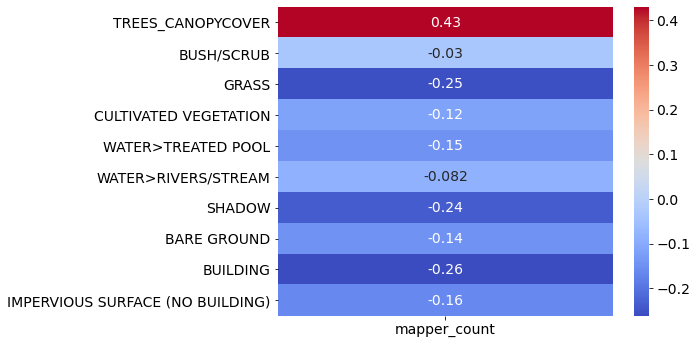

In [18]:
coincident.heat_map("Raw Heat Map")

In [19]:
coincident.ceo_frame 

,lat,lon,mapper_count,elevation,CENTER_LON,CENTER_LAT,SHAPE,FLAGGED,USER_ID,COMMON_SECUREWATCH_DATE,...,LAND COVER ELEMENTS:CULTIVATED VEGETATION,LAND COVER ELEMENTS:WATER>TREATED POOL,LAND COVER ELEMENTS:WATER>LAKE/PONDED/CONTAINER,LAND COVER ELEMENTS:WATER>RIVERS/STREAM,LAND COVER ELEMENTS:WATER>IRRIGATION DITCH,LAND COVER ELEMENTS:SHADOW,LAND COVER ELEMENTS:UNKNOWN,LAND COVER ELEMENTS:BARE GROUND,LAND COVER ELEMENTS:BUILDING,LAND COVER ELEMENTS:IMPERVIOUS SURFACE (NO BUILDING)
0,18.027425,-67.148520,0,0.0,-67.148609,18.027135,square,False,joanegraniela@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,16.528926,0.0,27.272727,9.090909,2.479339
1,29.480144,-98.470846,0,0.0,-98.470445,29.480348,square,False,lexilemon36@outlook.com,NaN,...,6.611570,0.000000,0.0,0.000000,0.0,0.000000,0.0,4.132231,4.958678,14.049587
2,29.781019,-95.431896,5,0.0,-95.434583,29.780713,square,False,crystalyagami@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,4.958678,0.0,0.000000,0.000000,72.727273
3,29.781019,-95.431896,5,0.0,-95.430092,29.780713,square,False,crystalyagami@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,18.181818,0.0,14.049587,42.148760,7.438017
4,29.781038,-95.430862,0,0.0,-95.430092,29.780713,square,False,crystalyagami@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,18.181818,0.0,14.049587,42.148760,7.438017
5,29.781057,-95.429829,0,0.0,-95.430092,29.780713,square,False,crystalyagami@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,18.181818,0.0,14.049587,42.148760,7.438017
6,29.781076,-95.428795,0,0.0,-95.430092,29.780713,square,False,crystalyagami@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,18.181818,0.0,14.049587,42.148760,7.438017
7,30.301337,-97.888287,1,0.0,-97.887737,30.301612,square,False,frankwei935@gmail.com,NaN,...,0.000000,0.000000,0.0,0.000000,0.0,1.652893,0.0,3.305785,0.000000,0.000000
8,30.364600,-97.900059,0,0.0,-97.900144,30.364757,square,False,karishu@lingacup.com,NaN,...,20.661157,0.000000,0.0,0.000000,0.0,14.876033,0.0,0.000000,0.000000,47.933884
9,33.094165,-96.739116,0,0.0,-96.740409,33.093944,square,False,michaelc75025@gmail.com,NaN,...,0.000000,0.826446,0.0,0.000000,0.0,0.000000,0.0,0.000000,37.190083,19.008264


In [20]:
# Removes concentrated point
coincident.ceo_frame= coincident.ceo_frame.drop(12, axis = 0)

In [21]:
coincident.correlation_matrix()

,mapper_count
TREES_CANOPYCOVER,-0.391377
BUSH/SCRUB,0.383099
GRASS,0.625936
CULTIVATED VEGETATION,-0.238299
WATER>TREATED POOL,-0.302255
WATER>RIVERS/STREAM,-0.169448
SHADOW,-0.180020
BARE GROUND,-0.251339
BUILDING,0.070521
IMPERVIOUS SURFACE (NO BUILDING),0.482887


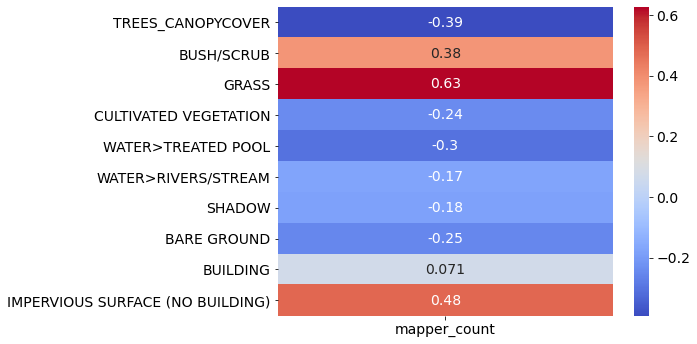

In [22]:
coincident.heat_map("Updated Heat Map")

In [23]:
# logout of AppEEARS
token = token_response['token']
response = requests.post(
    'https://lpdaacsvc.cr.usgs.gov/appeears/api/logout', 
    headers={'Authorization': 'Bearer {0}'.format(token)})
print(response.status_code)

204
